In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/bike_sharing.csv')

**Performing Exploratory Data Analysis**

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**A SHORT DESCRIPTION OF THE FEATURES**.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday (0 - not a holiday)

workingday - whether the day is neither a weekend nor holiday
0 = Weekend or holiday
1 = Regular working day

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals (count = casual + registered)



In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


*Data types conversion*
- converting the datetime column into datetime data type
- converting the season, holiday, workingday, weather columns into category


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])
category_columns = ['season', 'holiday', 'workingday' , 'weather']
df[category_columns] = df[category_columns].astype('category')

In [10]:
df.duplicated().sum()

0

Analyzing the distribution of categorical and numerical variables

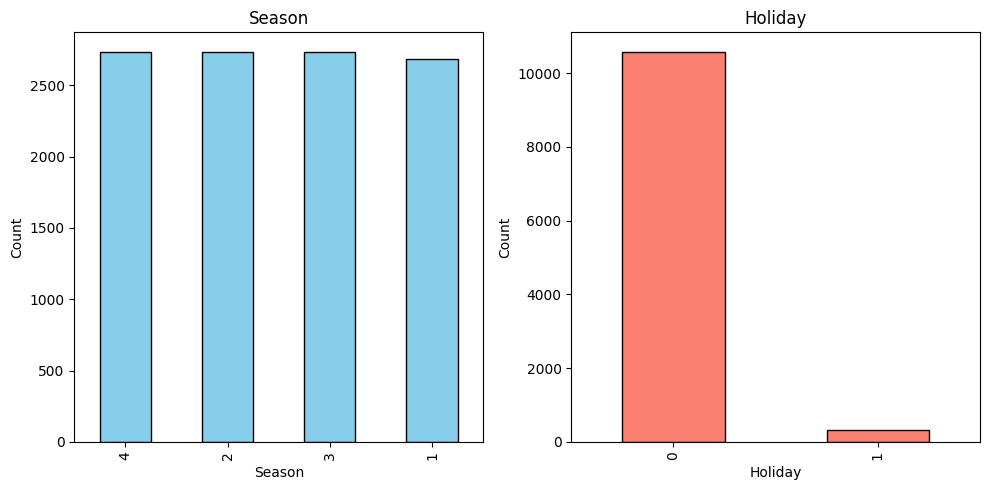

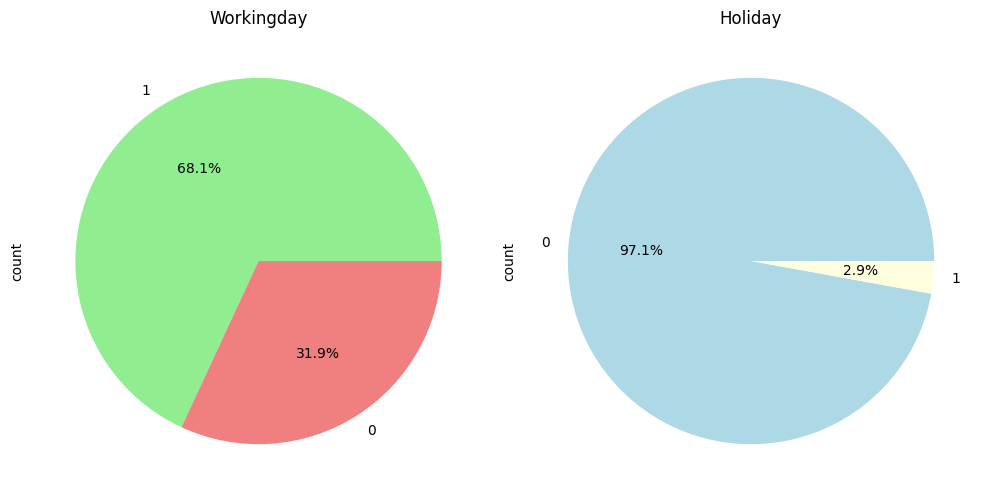

In [11]:
# Analyzing Categorical columns

cat_cols = ['season', 'holiday', 'workingday', 'weather']

# Create bar charts for 'season' and 'holiday'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['season'].value_counts().plot(kind='bar', color = 'skyblue', edgecolor='black')
plt.title('Season')
plt.xlabel('Season')
plt.ylabel('Count')

plt.subplot(1,2,2)
df['holiday'].value_counts().plot(kind='bar', color = 'salmon', edgecolor='black')
plt.title('Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create pie charts for 'workingday' and 'holiday'

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['workingday'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Workingday')

plt.subplot(1, 2, 2)
df['holiday'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightyellow', 'lightgrey'])
plt.title('Holiday')

plt.tight_layout()
plt.show()


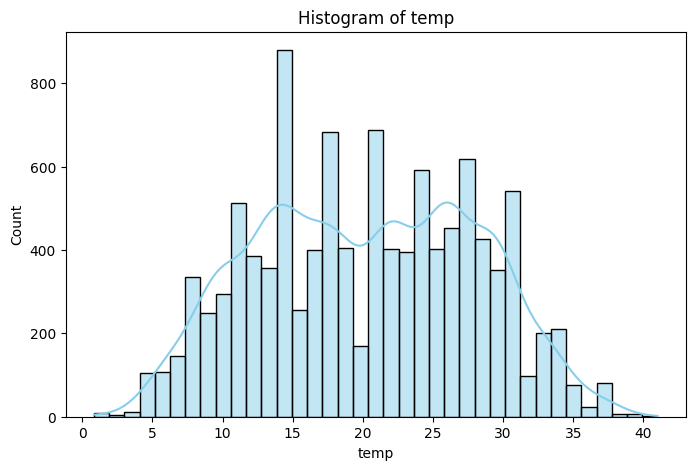

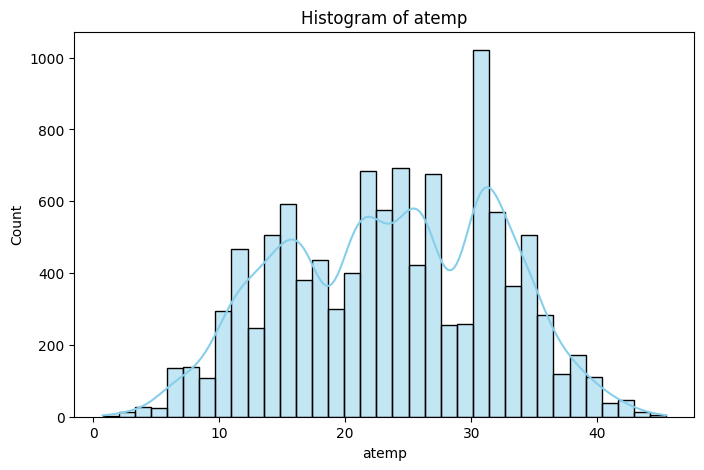

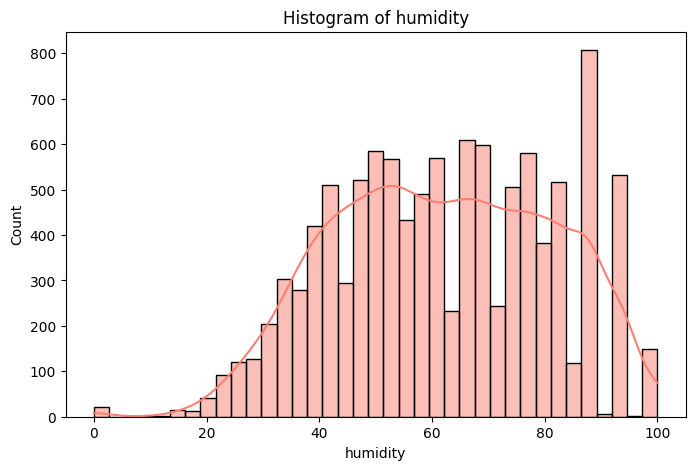

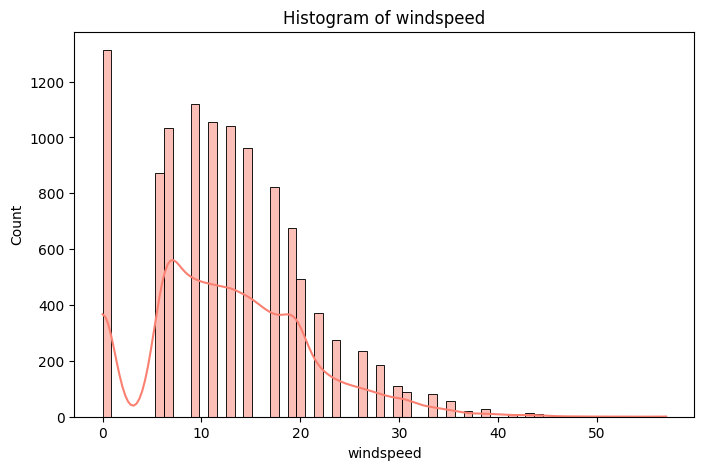

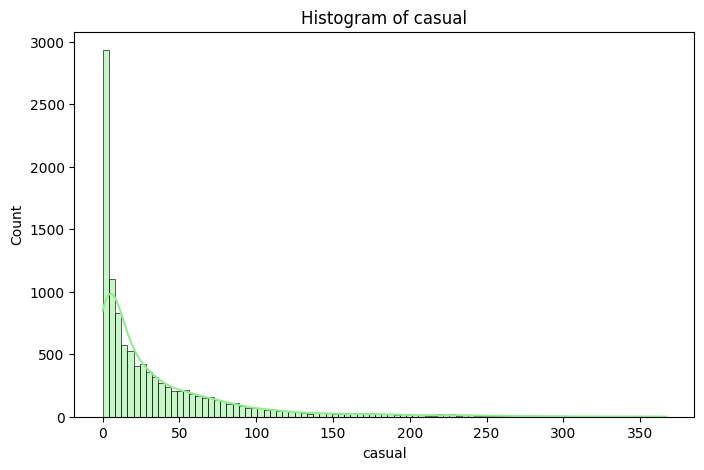

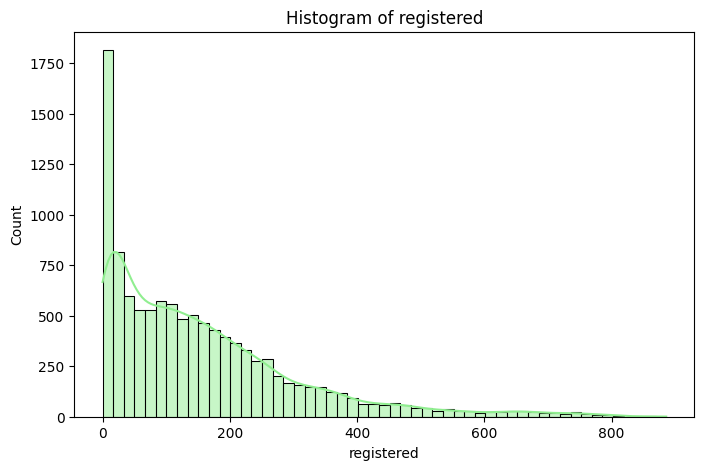

<Figure size 800x500 with 0 Axes>

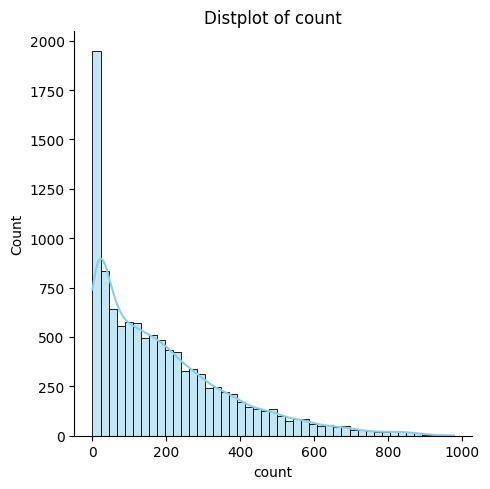

In [12]:
# Analyzing Numerical columns

numerical_cols = ['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for col in numerical_cols:
  plt.figure(figsize=(8,5))
  if col in ['temp','atemp']:
    sns.histplot(df[col],kde=True,color='skyblue',edgecolor='black')
    plt.title(f'Histogram of {col}')

  elif col in ['humidity', 'windspeed']:
        sns.histplot(df[col], kde=True, color='salmon', edgecolor='black')
        plt.title(f'Histogram of {col}')
  elif col in ['casual', 'registered']:
        sns.histplot(df[col], kde=True, color='lightgreen', edgecolor='black')
        plt.title(f'Histogram of {col}')
  else:
        sns.displot(data=df, x=col, kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Distplot of {col}')

plt.tight_layout()
plt.show()

**Bivariant analysis**


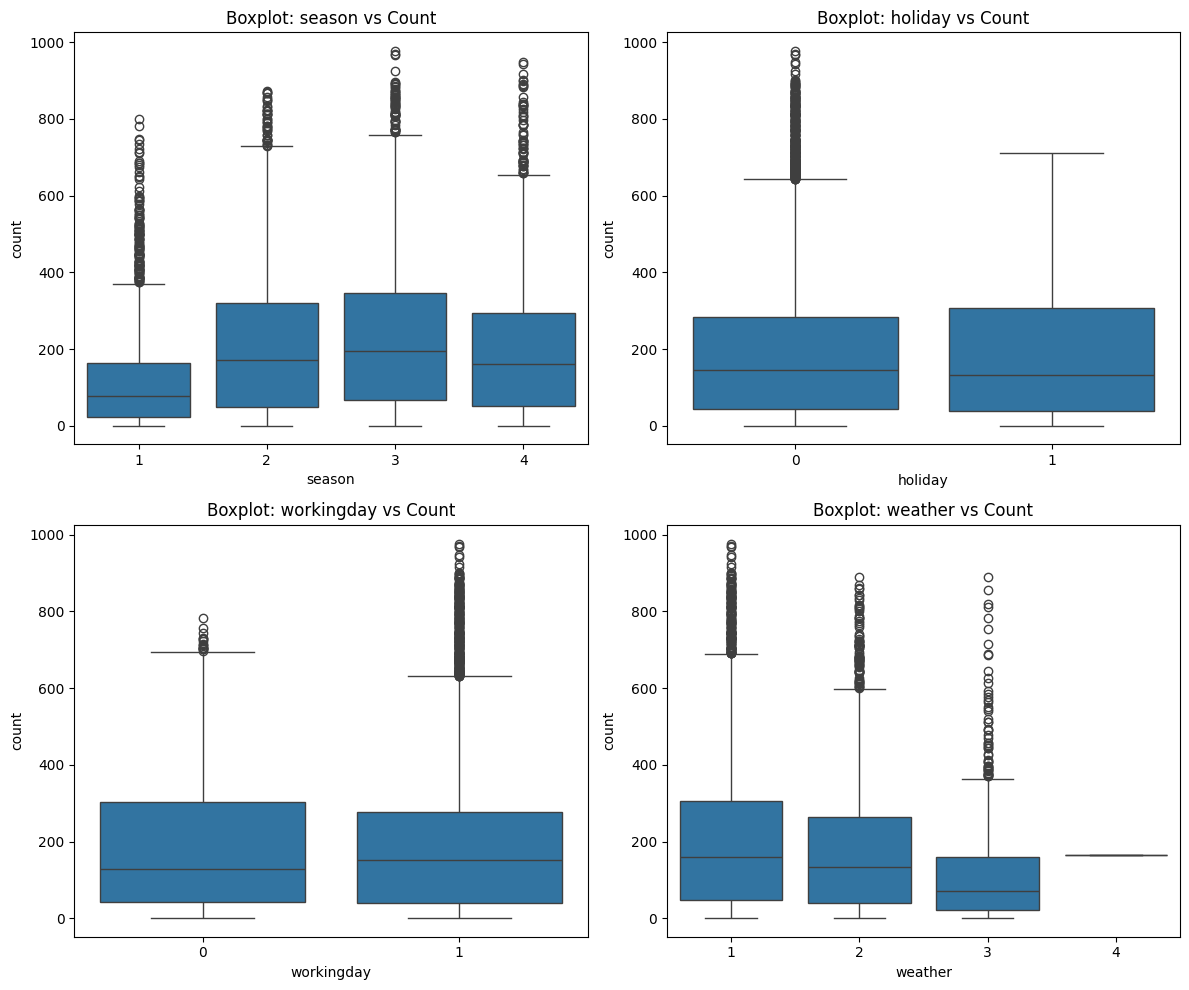

In [13]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axes[row,col])
    axes[row,col].set_title(f'Boxplot: {cat_cols[index]} vs Count')
    index+=1
plt.tight_layout()
plt.show()

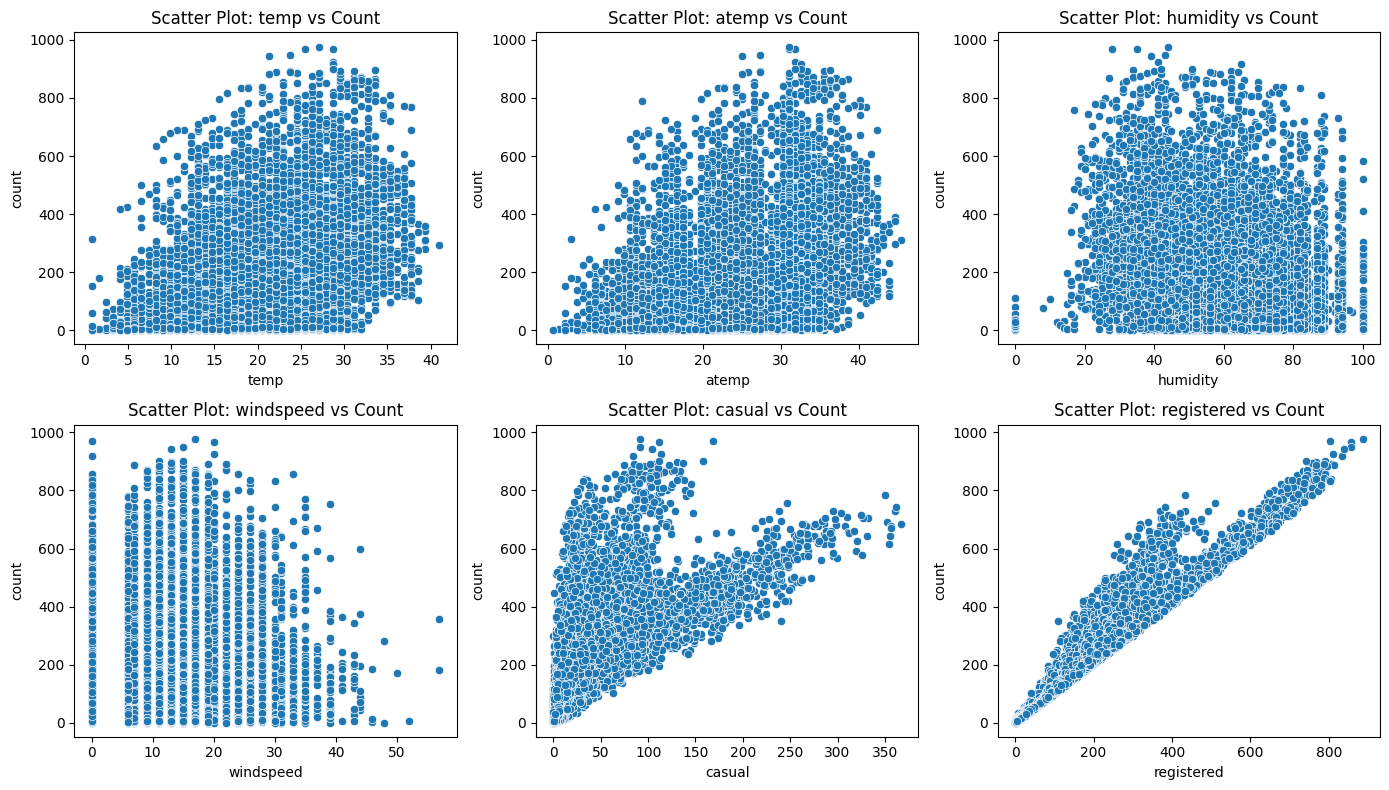

In [14]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
# Create scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
index = 0
for row in range(2):
    for col in range(3):
      sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axes[row,col])
      axes[row, col].set_title(f'Scatter Plot: {num_cols[index]} vs Count')
      index += 1

plt.tight_layout()
plt.show()

Outlier detection and Cliping

Text(0.5, 1.0, 'box plot before removing outlier')

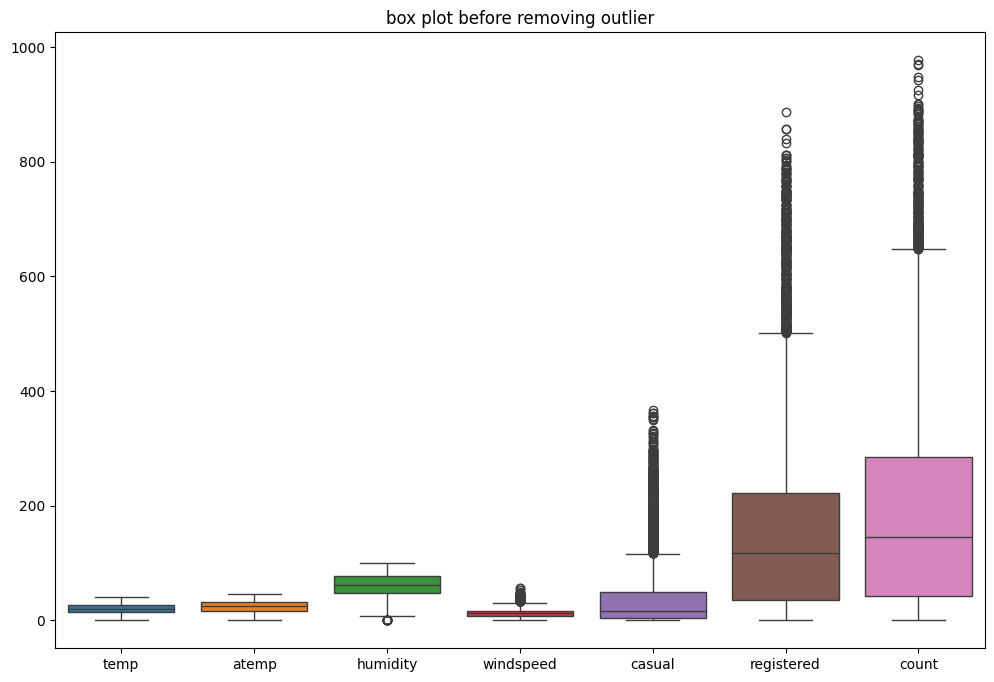

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)
plt.title('box plot before removing outlier')

In [16]:
numerical_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

Using IQR Method to Identify the Outlier and np.clip to clip the outlier

In [17]:
for cols in numerical_cols:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  IQR = Q3 - Q1
  Lower_fence = Q1 - 1.5 * IQR
  Upper_fence = Q3 + 1.5 * IQR
  outliers = ((df[cols] < Lower_fence) | (df[cols] > Upper_fence))
  df[cols] = np.clip(df[cols], Lower_fence, Upper_fence)

Box plot after removing outlier

Text(0.5, 1.0, 'box plot after removing outlier')

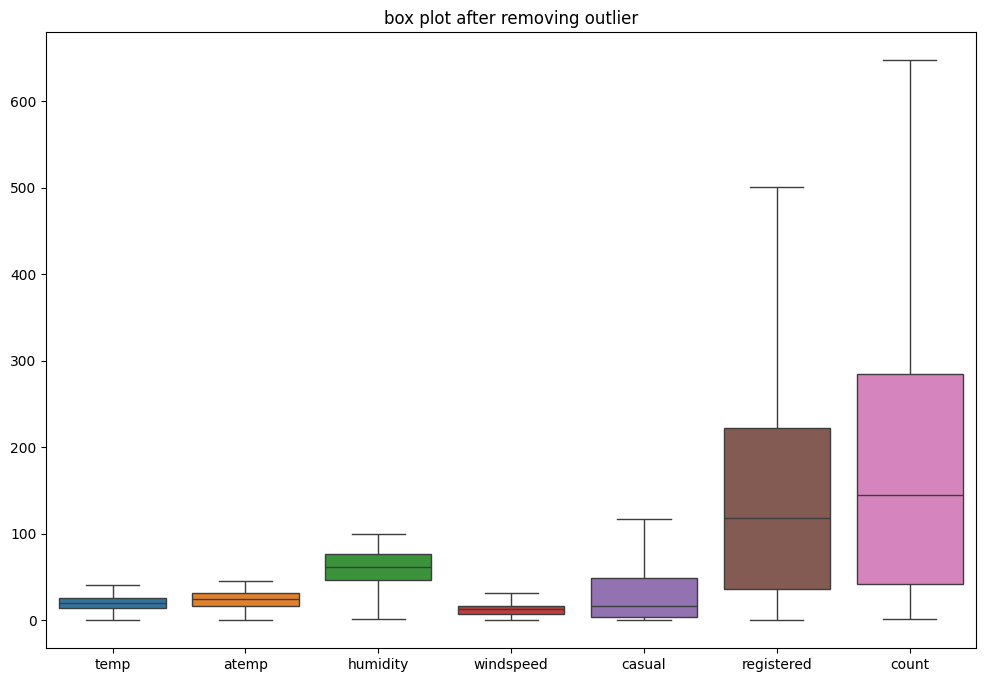

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)
plt.title('box plot after removing outlier')

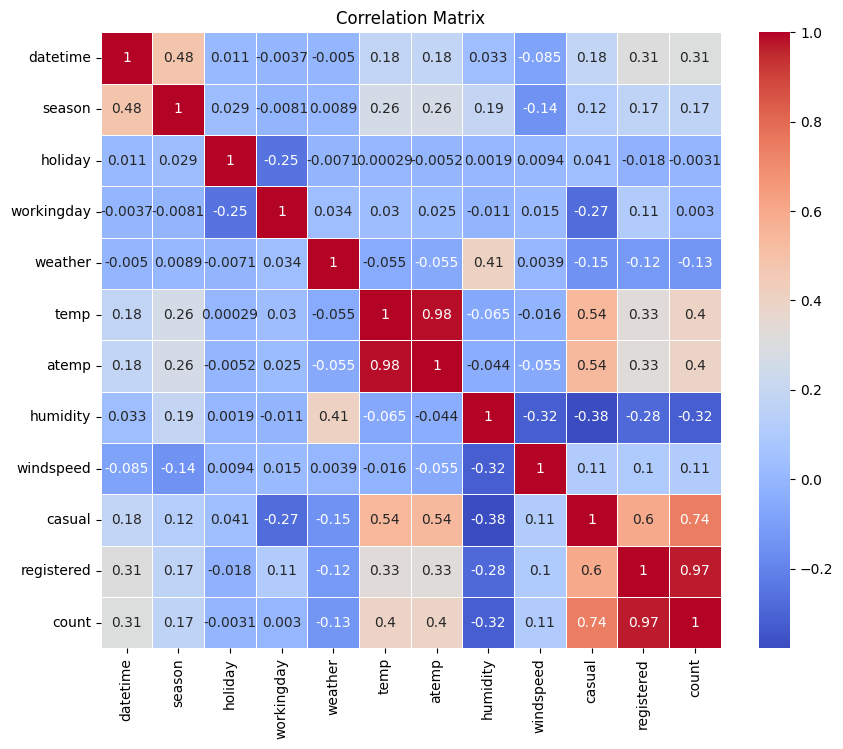

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



**Hypothesis Testing**

**Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

In [20]:
weekday_rides = df[df['workingday'] == 1]['count']
weekend_rides = df[df['holiday'] == 0]['count']

Since we are comparing two independent groups (weekday rides vs. weekend rides), we use an independent t-test

-*Null Hypothesis (H₀)*: There is no significant difference in the number of rides between weekdays and weekends. (i.e., the mean number of rides is the same for both.)

-*Alternative Hypothesis (H₁)*: There is a significant difference in the number of rides between weekdays and weekends.

In [21]:
from scipy.stats import ttest_ind

# Perform t test
t_stat, p_value = ttest_ind(weekday_rides,weekend_rides)
alpha = 0.5
# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in the number of rides between weekdays and weekends.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the number of rides between weekdays and weekends.")

T-statistic: 0.1017
P-value: 0.9190
Fail to reject the null hypothesis. There is no significant difference in the number of rides between weekdays and weekends.


**Check if the demand of bicycles on rent is the same for different Weather conditions?**


Assumptions of the test



1. Normality check (shapiro Test)

In [23]:
from scipy.stats import shapiro
stat, p_value = shapiro(df['count'])
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 0.8877828325283774, p-value: 2.2783732584893616e-66


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


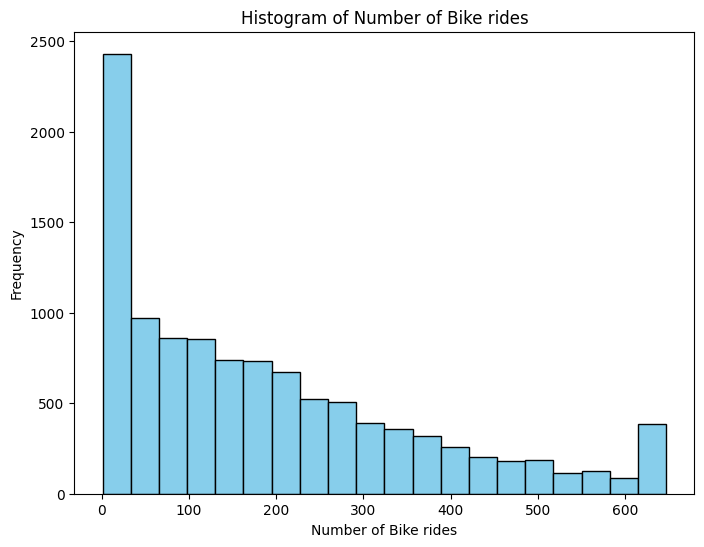

In [24]:
# Histogram of 'count' variable
plt.figure(figsize=(8,6))
plt.hist(df['count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Bike rides')
plt.xlabel('Number of Bike rides')
plt.ylabel('Frequency')
plt.show()

Bell-shaped curve → Data is likely normally distributed.
Skewed or multiple peaks → Data deviates from normality.

The right-skewed pattern (more values concentrated on the left) confirms that the data is not normally distributed.

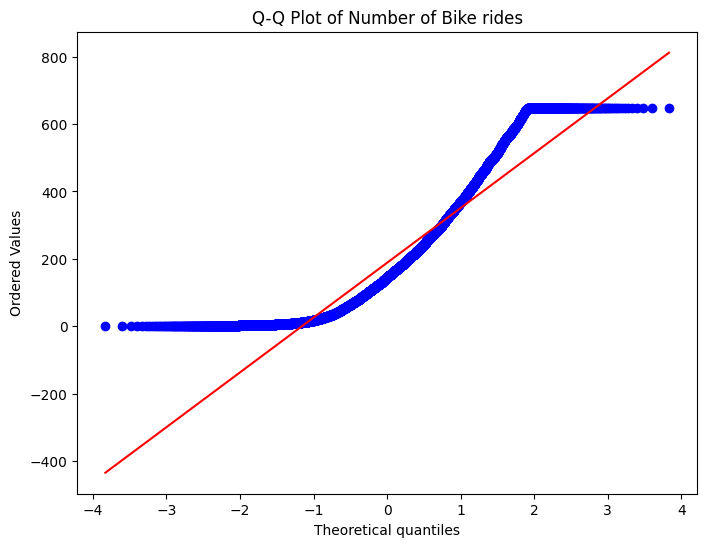

In [25]:
# Q-Q plot of 'count' variable
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['count'], dist='norm',plot=plt)
plt.title('Q-Q Plot of Number of Bike rides')
plt.show()

2. Equality of Variance Assumption

Levene's Test - Levene’s test is used to check whether the variances of multiple groups are equal (homoscedasticity) or not.

It checks if the variance in bike ride counts differs across weather conditions.


In [26]:
from scipy.stats import levene

# Levene's test for equality of variance
stat, p_value = levene(df['count'][df['weather'] == 1],
                        df['count'][df['weather'] == 2],
                        df['count'][df['weather'] == 3],
                        df['count'][df['weather'] == 4])
print(f"Levene's Test - Statistic: {stat}, p-value: {p_value}")

if p_value <= 0.05:
  print('Reject Null Hypothesis')
  print('Variance are not equal')
else:
  print('Fail to reject null')
  print('Variance are equal')

Levene's Test - Statistic: 59.78620431801216, p-value: 2.499984328437755e-38
Reject Null Hypothesis
Variance are not equal


Since the dataset does not meet the assumptions required for ANOVA, such as normality and homogeneity of variances, we need to use a non-parametric alternative. One such alternative is the Kruskal-Wallis test, which is a non-parametric version of ANOVA and is suitable for comparing groups when the assumptions of ANOVA are not met.

The **Kruskal-Wallis Test** is a non-parametric statistical test used to determine if there are significant differences between multiple independent groups.

H0: The demand of bicyle on rent is the same across different weather conditions

H1: The demand for bicycles on rent varies significantly across different weather conditions.

In [27]:
weather_groups = []
for weather_condition in df['weather'].unique():
    weather_groups.append(df[df['weather'] == weather_condition]['count'])

from scipy.stats import kruskal
stat, p_value = kruskal(*weather_groups)
print(f"Kruskal-Wallis Test - Statistic: {stat}, p-value: {p_value}")


Kruskal-Wallis Test - Statistic: 205.04853208154285, p-value: 3.421748763291878e-44


In [28]:
alpha = 0.05

if p_value <= alpha:
    print("Reject the null hypothesis: There are significant differences in demand for bicycles across different weather conditions.")
else:
    print("Fail to  reject the null hypothesis: There is no significant difference in demand for bicycles across different weather conditions.")


Reject the null hypothesis: There are significant differences in demand for bicycles across different weather conditions.


In [21]:
#ANOVA assumes normality and equal variances, but your Shapiro-Wilk test and Q-Q plot showed that 'count' is not normally distributed.
#The Kruskal-Wallis test does not require normality, making it suitable for this dataset.

**Check if the demand of bicycles on rent is the same for different Seasons?**


Check Assumptions for Anova

1. Normality check (shapiro Test)

In [29]:
stat, p_value = shapiro(df['count'])
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 0.8877828325283774, p-value: 2.2783732584893616e-66


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


2. levene`s Test

In [30]:
stat, p_value = levene(df['count'][df['season'] == 1],
                        df['count'][df['season'] == 2],
                        df['count'][df['season'] == 3],
                        df['count'][df['season'] == 4])
print(f"Levene's Test - Statistic: {stat}, p-value: {p_value}")

Levene's Test - Statistic: 199.5119672794296, p-value: 5.7233179707619984e-126


H0: The demand for bicycle on rent is the same across different seasons.

H1: The demand for bicycles on rent varies significantly across different seasons.

kruskal Test

In [32]:
season_groups = []
for season in df['season'].unique():
  season_groups.append(df[df['season'] == season]['count'])

stat, p_value = kruskal(*season_groups)
print(f"Kruskal-Wallis Test - Statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis Test - Statistic: 699.2817665514561, p-value: 3.0045514163996123e-151


In [38]:
if p_value <= 0.05:
    print("Reject the null hypothesis: The demand for bicycles on rent is NOT the same across different seasons.")
else:
    print("Fail to reject the null hypothesis: The demand for bicycles on rent is the same across different seasons.")


Reject the null hypothesis: The demand for bicycles on rent is NOT the same across different seasons.


**Check if the Weather conditions are significantly different during different Seasons?**


Since we are comparing two categorical variables, weather and season, both of which represent different categories or levels, the appropriate statistical test to determine if there is a significant association between them is the Chi-Square test.


H0: The distribution of weather conditions is the same across different seasons.

H1: The distribution of weather conditions is different across different seasons.

In [34]:
contingency_table = pd.crosstab(df['season'], df['weather'])
print(contingency_table)

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


In [35]:
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test - Chi2 Statistic: {chi2_stat}, p-value: {p_value}")

Chi-square Test - Chi2 Statistic: 49.158655596893624, p-value: 1.549925073686492e-07


In [37]:
if p_value <= 0.05:
    print("Reject the null hypothesis: The distribution of weather conditions is NOT the same across different seasons.")
else:
    print("Fail to reject the null hypothesis: The distribution of weather conditions is the same across different seasons.")


Reject the null hypothesis: The distribution of weather conditions is NOT the same across different seasons.
